In [ ]:
import pandas as pd

In [ ]:
population_total_data = pd.read_csv(
    '/Volumes/KeQing/Documents/营口理工学院/大二下学期/其他/2023年6月/program/data/World Population 1960-2018/population_total_long.csv')
population_total_data.head()

In [ ]:
from models.data_util import split_from_arrange_values

data_dict = split_from_arrange_values(population_total_data, 'Year', 'population_total_data')

In [ ]:
for i in data_dict.keys():
    data_dict[i].to_csv(
        '/Volumes/KeQing/Documents/营口理工学院/大二下学期/其他/2023年6月/program/data/split_dataset/population_total_data_1960_2017/' + i + '.csv')

# 计算人均GDP

In [ ]:
test_gdp = pd.read_csv(
    '/Volumes/KeQing/Documents/营口理工学院/大二下学期/其他/2023年6月/program/data/split_dataset/word_country_gdp_1960_2021/dataset_0.csv').iloc[
           :, 1:]
test_population = pd.read_csv(
    '/Volumes/KeQing/Documents/营口理工学院/大二下学期/其他/2023年6月/program/data/split_dataset/population_total_data_1960_2017/population_total_data_1960.csv').iloc[
                  :, 1:]

In [ ]:
test_population.keys()

In [ ]:
test_gdp.keys()

# 1960-2017发达国家的数量

In [ ]:
population_gdp_country = pd.merge(test_gdp, test_population, on=['Country Name'])

In [ ]:
population_gdp_country.count(axis=0)

In [ ]:
gdp_2021 = pd.read_csv(
    '/Volumes/KeQing/Documents/营口理工学院/大二下学期/其他/2023年6月/program/data/split_dataset/word_country_gdp_1960_2021/dataset_61.csv').iloc[
           :, 1:]
gdp_2021 = gdp_2021[gdp_2021['GDP_per_capita_USD'] > 30000]
gdp_2021

In [ ]:
gdp_2021.count(axis=0)['Country Name']

In [ ]:
import os

path = '/Volumes/KeQing/Documents/营口理工学院/大二下学期/其他/2023年6月/program/data/split_dataset/word_country_gdp_1960_2021'

In [ ]:
population_total_data_1060_2017_paths = []
for (dir_path, dir_names, file_names) in os.walk(path):
    for file_name in file_names:
        population_total_data_1060_2017_paths.append(os.path.join(dir_path, file_name))

In [ ]:
import pandas as pd

developed_country_count_array = []
for i in population_total_data_1060_2017_paths:
    gdp = pd.read_csv(i)
    developed_country_count = gdp[gdp['GDP_per_capita_USD'] > 30000].count(axis=0)['Country Name']
    developed_country_count_array.append([gdp.iloc[0, 3], developed_country_count])

In [ ]:
developed_country_count_array.sort()

In [ ]:
import numpy as np

plt_data = np.array(developed_country_count_array)

# 1960年到2021年间人均GDP超过30000美元的国家数量变化情况

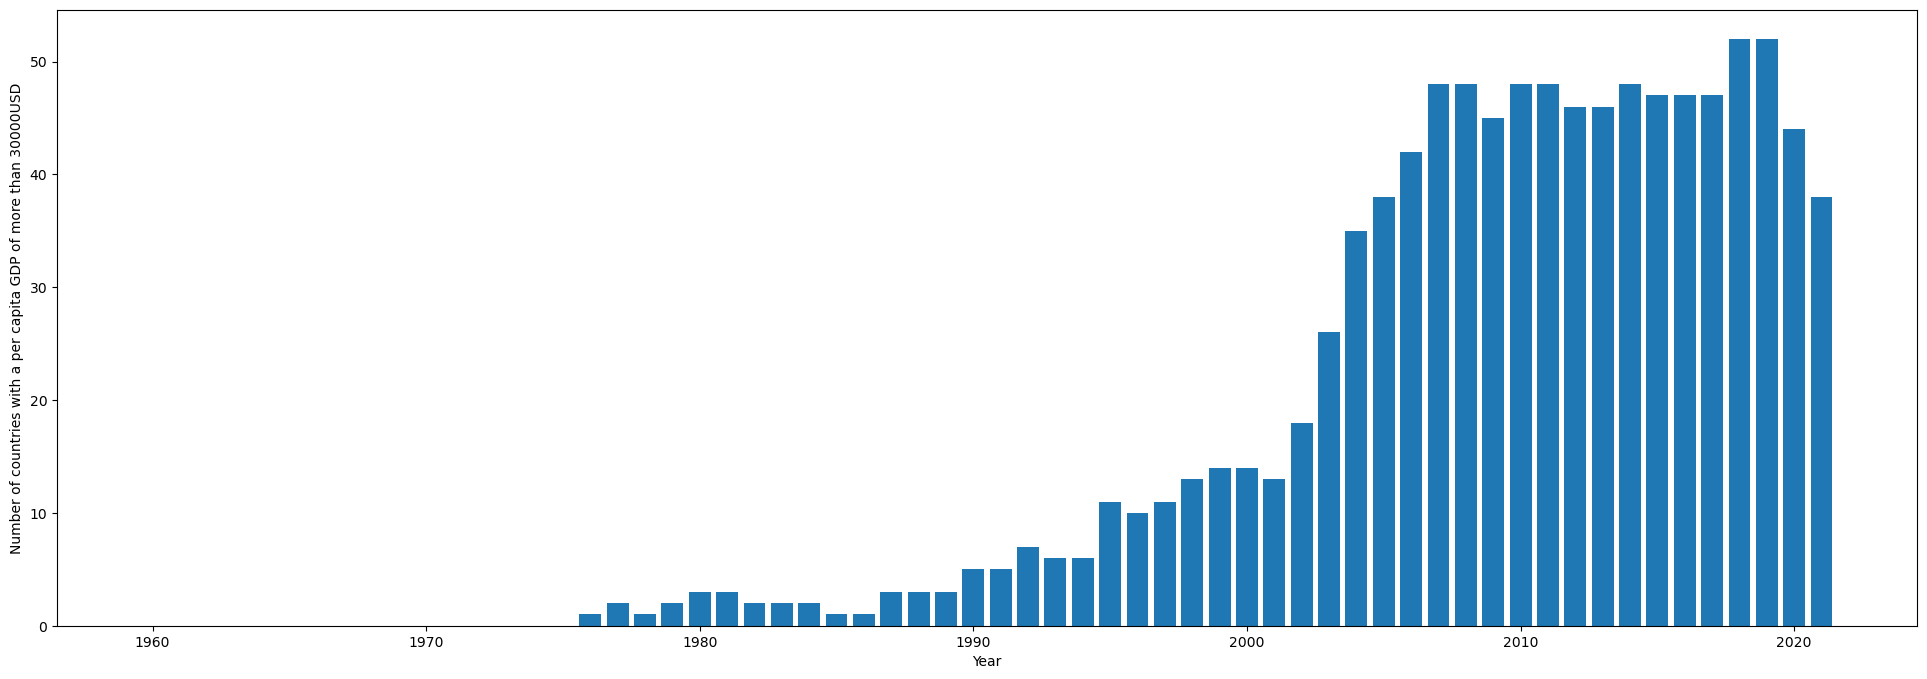

In [76]:
import matplotlib.pyplot as plt

plt.figure(figsize=(24, 8))
plt.bar(plt_data[:, 0], plt_data[:, 1])
plt.xlabel('Year')
plt.ylabel('Number of countries with a per capita GDP of more than 30000USD')
plt.show()

In [ ]:
developed_country_count_array = np.array(developed_country_count_array)

In [ ]:
from models.data_util import switch_growth_rate

developed_country_count_array_rate = switch_growth_rate(developed_country_count_array, axis=1)[:, 1:]

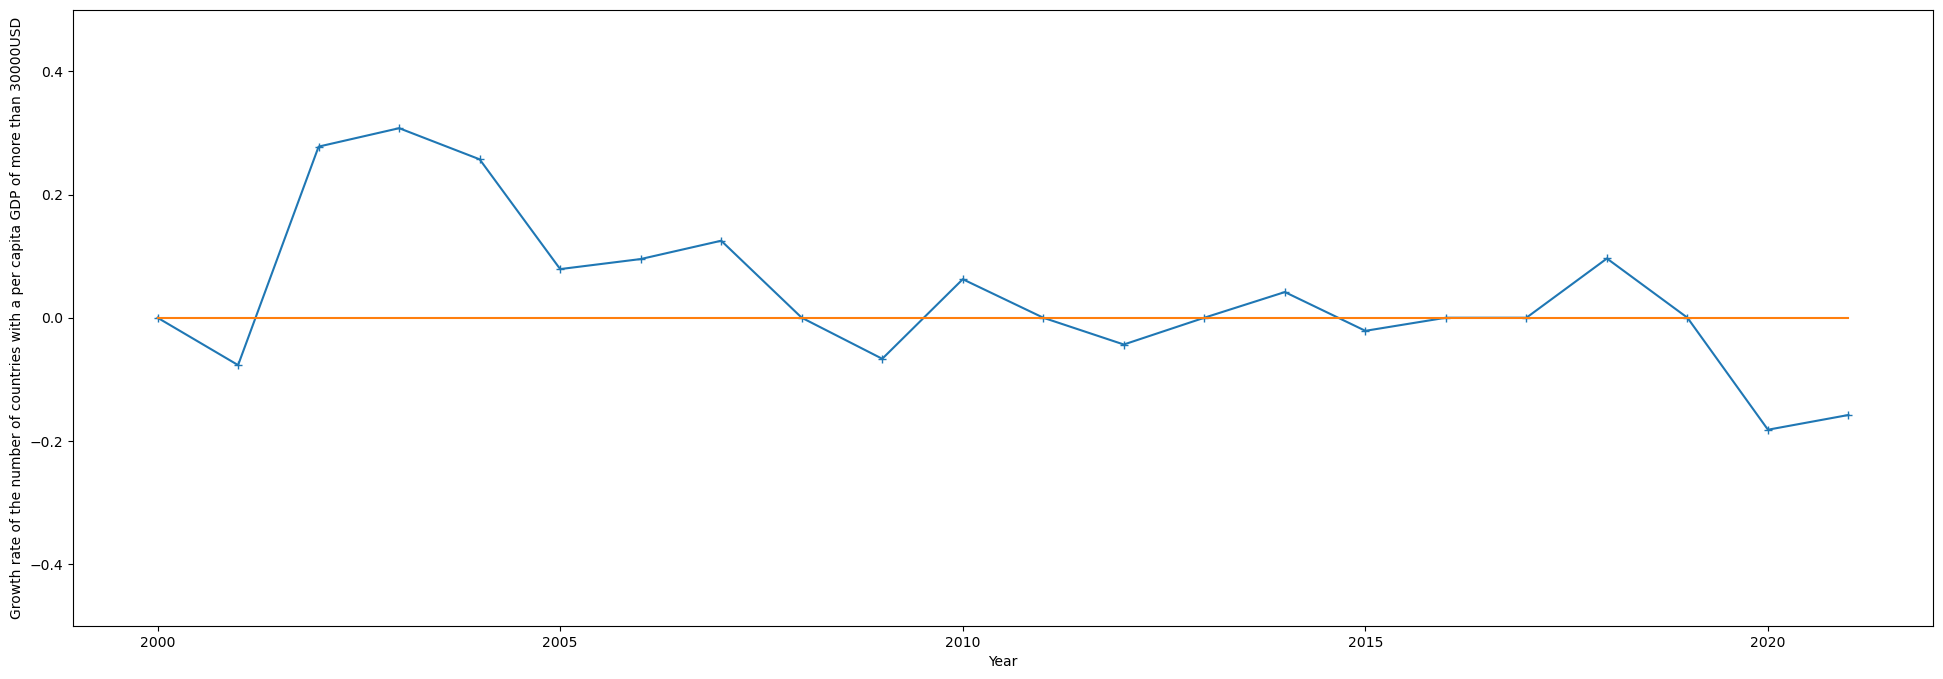

In [80]:
plt.figure(figsize=(24, 8))
plt.plot(plt_data[40:, 0], developed_country_count_array_rate[39:], marker='+')
plt.plot(plt_data[40:, 0], np.zeros((22, 1)))
plt.xlabel('Year')
plt.ylabel('Growth rate of the number of countries with a per capita GDP of more than 30000USD')
plt.ylim([-0.5, 0.5])
plt.show()

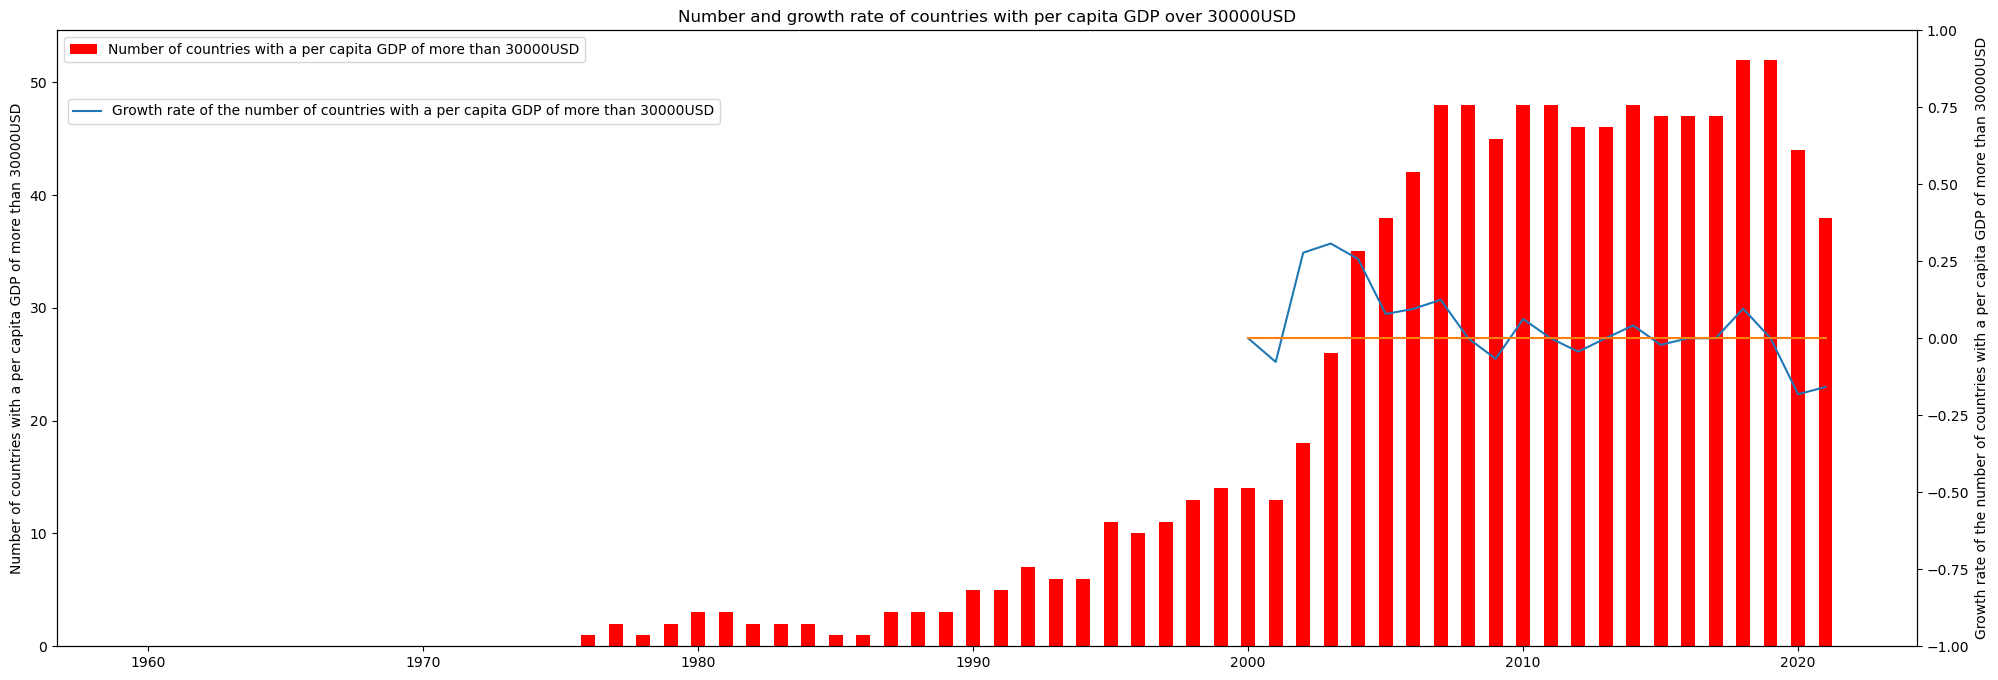

In [99]:
plt.figure(figsize=(24, 8))
plt.title('Number and growth rate of countries with per capita GDP over 30000USD')
ax1 = plt.gca()
ax1.bar(x=plt_data[:, 0], height=plt_data[:, 1], width=0.5, color='red')
plt.ylabel('Number of countries with a per capita GDP of more than 30000USD')
plt.legend(['Number of countries with a per capita GDP of more than 30000USD'], loc='upper left')

ax2 = plt.twinx()
ax2.plot(plt_data[40:, 0], developed_country_count_array_rate[39:])
plt.ylabel('Growth rate of the number of countries with a per capita GDP of more than 30000USD')
ax2.legend(['Growth rate of the number of countries with a per capita GDP of more than 30000USD'], loc='upper left',
           bbox_to_anchor=(0.002, 0.9))
ax2.plot(plt_data[40:, 0], np.zeros((22, 1)))
plt.ylim([-1, 1])
plt.show()